In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#RUN THIS CODE TO LOAD FIRST DATAFRAME
#(Pickle allows you to save any object (like dataframes) to ur file system)

df = pd.read_pickle("./data/data_pkls/stock50.pkl")

### Exploratory Data Analysis

In [3]:
#Check data frame head and tail

#Comment one line
#df.head()
df.tail()

GOOG                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2024-01-08  138.000000  140.639999  137.880005  140.529999  140.529999   
2024-01-09  140.059998  142.800003  139.789993  142.559998  142.559998   
2024-01-10  142.520004  144.524994  142.460007  143.800003  143.800003   
2024-01-11  144.895004  146.660004  142.214996  143.669998  143.669998   
2024-01-12  144.339996  144.739899  143.360001  144.240005  144.240005   

                              ABNB                                      ...  \
                Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2024-01-08  17645300.0  137.309998  140.250000  136.610001  140.080002  ...   
2024-01-09  19579700.0  138.520004  139.539993  137.789993  139.529999  ...   
2024-01-10  16641900.0  139.199997  140.824997  138.699997  139.759995  ...   
2024-01-11  17471100.0  140.710007  141.199997  137.550003  139.449997  ...   
2024-01-12  13710960.0  139.350006  140.990005  137.130005  137.139999  ...   

                  AMAT                                            MMM  \
                   Low       Close   Adj Close     Volume        Open   
Date                                                                    
2024-01-08  149.720001  151.559998  151.559998  6515500.0  108.260002   
2024-01-09  148.929993  151.029999  151.029999  5606700.0  108.199997   
2024-01-10  148.240005  149.809998  149.809998  5035700.0  109.019997   
2024-01-11  148.479996  151.949997  151.949997  5995600.0  108.300003   
2024-01-12  150.369995  151.250000  151.250000  4075853.0  109.419998   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2024-01-08  108.959999  107.589996  108.860001  108.860001  2119600  
2024-01-09  109.300003  107.349998  109.099998  109.099998  2458000  
2024-01-10  109.120003  107.839996  108.300003  108.300003  1999800  
2024-01-11  109.000000  107.209999  108.919998  108.919998  2685800  
2024-01-12  110.160004  107.889999  108.120003  108.120003  2913595  

[5 rows x 300 columns]

In [4]:
#Check size of the information
df.shape

(15615, 300)

In [5]:
#Comment different lines to see different things about the df

#datframe info
#df.info

#dataframe index
#df.index

#dataframe columns
#check companies
#df.columns.get_level_values(0).unique()

#check features about companies
df.columns.get_level_values(1).unique()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: xlabel='None-None', ylabel='Date'>

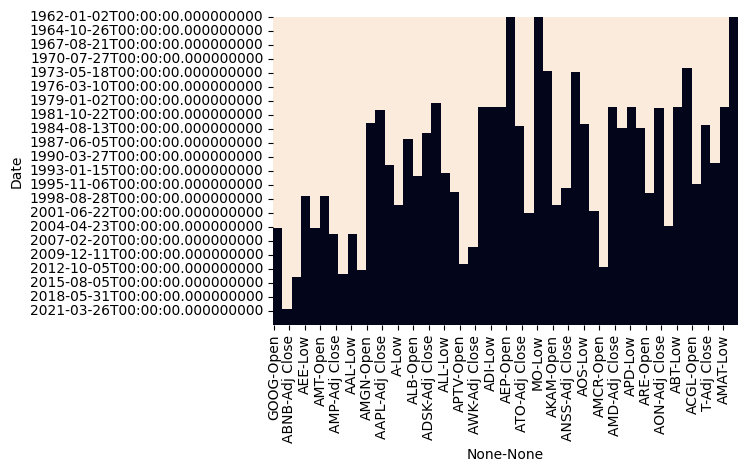

In [6]:
#Check for Missing values

plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),cbar=False)

#We can see that basically there is only complete data from 2021 to 2022 but if we can fix/infer close feature for airbnb we can have data from 2015
#Although I think 2 years of data is enough for first versions of the project - Juan HenaoBarrios

In [9]:
#Filter data by a single ticker and drop missing values for that ticker
ticker = 'AAPL'
single_ticker = df.loc[:, [ticker]]

#if we want to filter by date
#single_ticker.loc[single_ticker.index >= dt.datetime.strptime("2020-01-01", "%Y-%m-%d")]

single_ticker.dropna(inplace=True)
single_ticker.head()

AAPL                                                     
                Open      High       Low     Close Adj Close       Volume
Date                                                                     
1980-12-12  0.128348  0.128906  0.128348  0.128348  0.099319  469033600.0
1980-12-15  0.122210  0.122210  0.121652  0.121652  0.094137  175884800.0
1980-12-16  0.113281  0.113281  0.112723  0.112723  0.087228  105728000.0
1980-12-17  0.115513  0.116071  0.115513  0.115513  0.089387   86441600.0
1980-12-18  0.118862  0.119420  0.118862  0.118862  0.091978   73449600.0

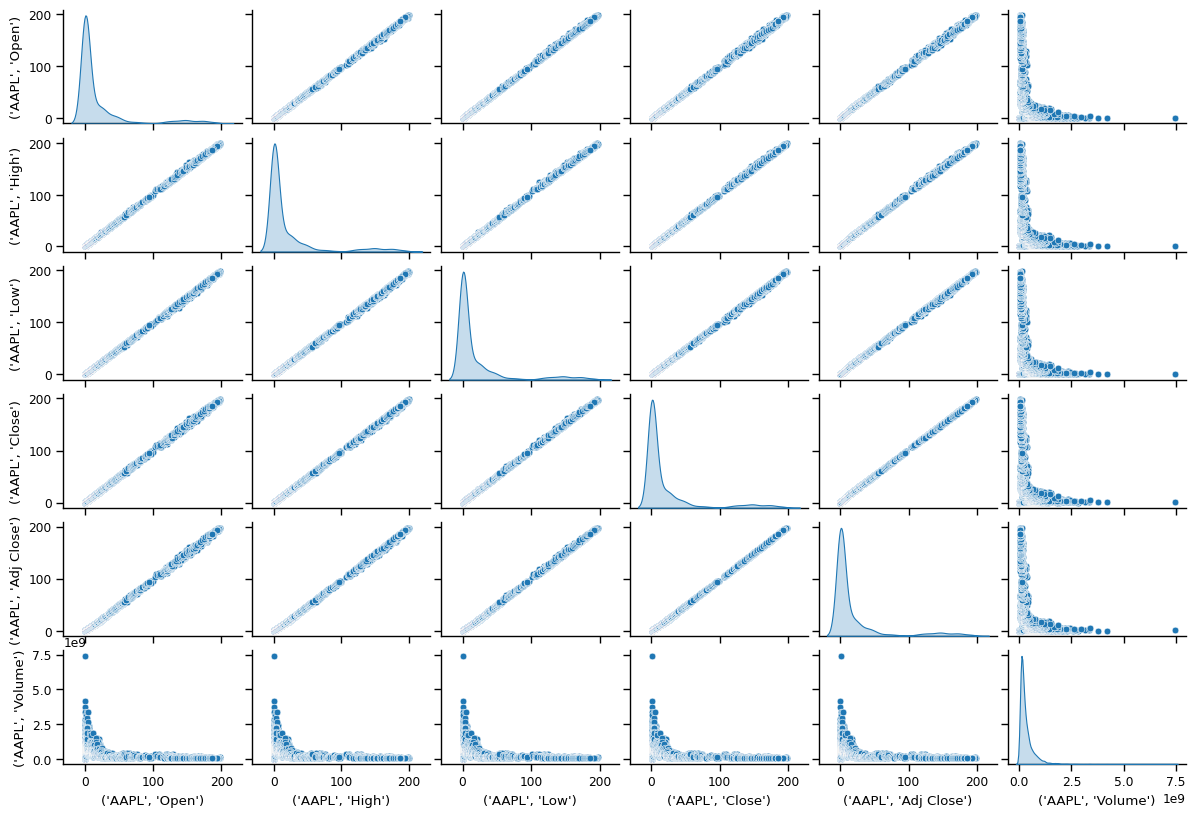

In [10]:
sns.set_context("paper")
g=sns.pairplot(data=single_ticker, diag_kind='kde')
g.fig.set_size_inches(12,8)

In [11]:
#drop ticker level for columns
single_ticker.columns = single_ticker.columns.droplevel(0)
single_ticker.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600.0


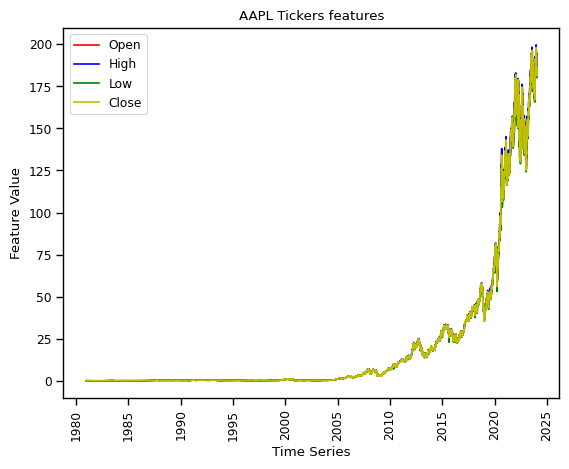

In [12]:
#Now let's plot values for Apple in this timeframe 
plt.plot(single_ticker.index, single_ticker['Open'], 'r', label='Open')
plt.plot(single_ticker.index, single_ticker['High'], 'b', label='High')
plt.plot(single_ticker.index, single_ticker['Low'] , 'g', label='Low')
plt.plot(single_ticker.index, single_ticker['Close'] , 'y', label='Close')
#plt.plot(single_ticker.index, single_ticker['Volume'], label='Volume')
plt.title('AAPL Tickers features')
plt.xlabel('Time Series')
plt.xticks(rotation=90)
plt.ylabel('Feature Value')
plt.legend()

plt.show()


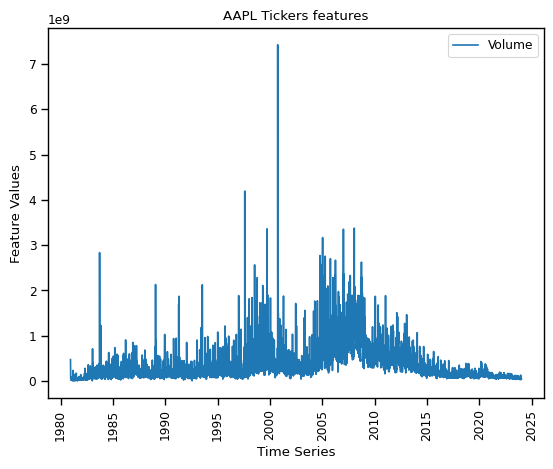

In [13]:
#Now let's plot values for Apple in this timeframe 
plt.plot(single_ticker.index, single_ticker['Volume'], label='Volume')
plt.title(ticker+' Tickers features')
plt.xlabel('Time Series')
plt.xticks(rotation=90)
plt.ylabel('Feature Values')
plt.legend()

plt.show()

In [15]:
#Finally let's check the range of the data
for feature in list(single_ticker.columns):
    print("Max value in ",feature,":",round(max(single_ticker[feature]), 2) )
    print("Min value in ",feature,":",round(min(single_ticker[feature]), 2) )

Max value in  Open : 198.02
Min value in  Open : 0.05
Max value in  High : 199.62
Min value in  High : 0.05
Max value in  Low : 197.0
Min value in  Low : 0.05
Max value in  Close : 198.11
Min value in  Close : 0.05
Max value in  Adj Close : 198.11
Min value in  Adj Close : 0.04
Max value in  Volume : 7421640800.0
Min value in  Volume : 0.0
